In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#EDA

In [7]:
df = pd.read_csv("laptop.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [13]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [17]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


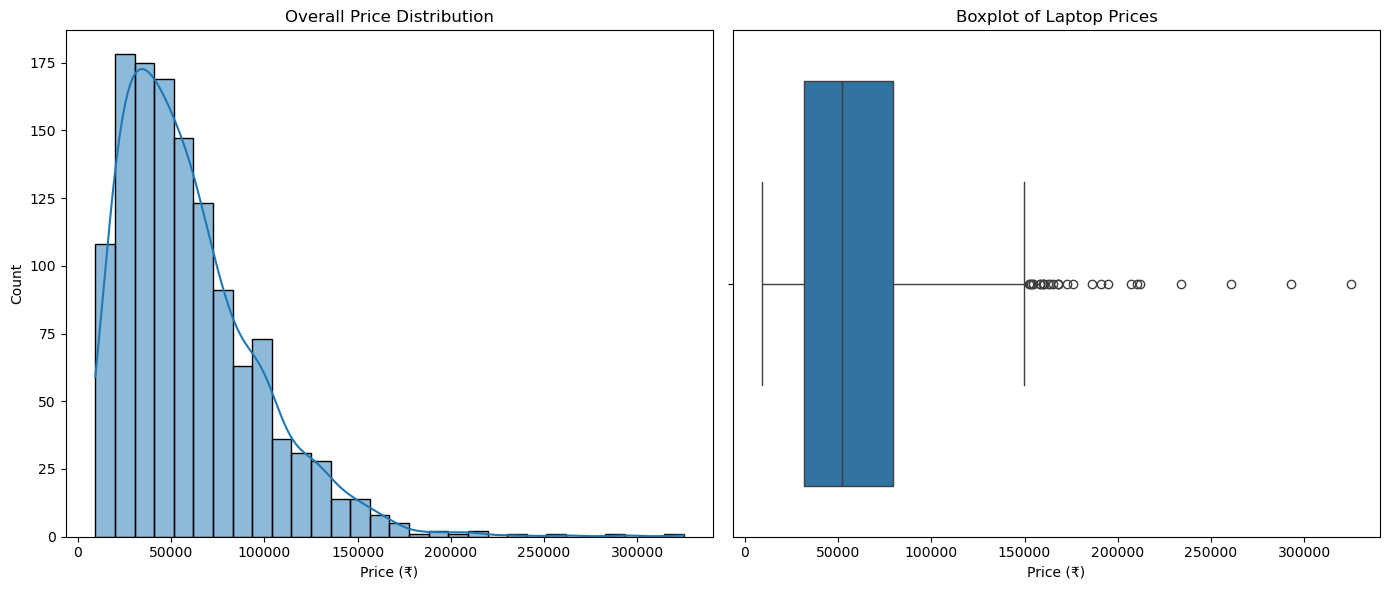

In [19]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Overall Price Distribution')
plt.xlabel('Price (₹)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Laptop Prices')
plt.xlabel('Price (₹)')

plt.tight_layout()
plt.show()

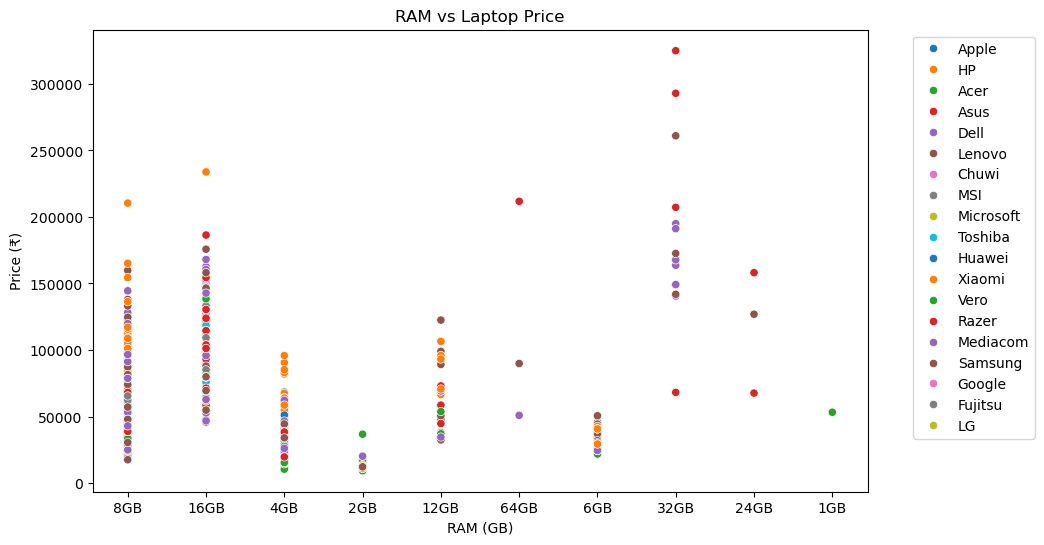

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ram', y='Price', hue='Company', palette='tab10')
plt.title('RAM vs Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

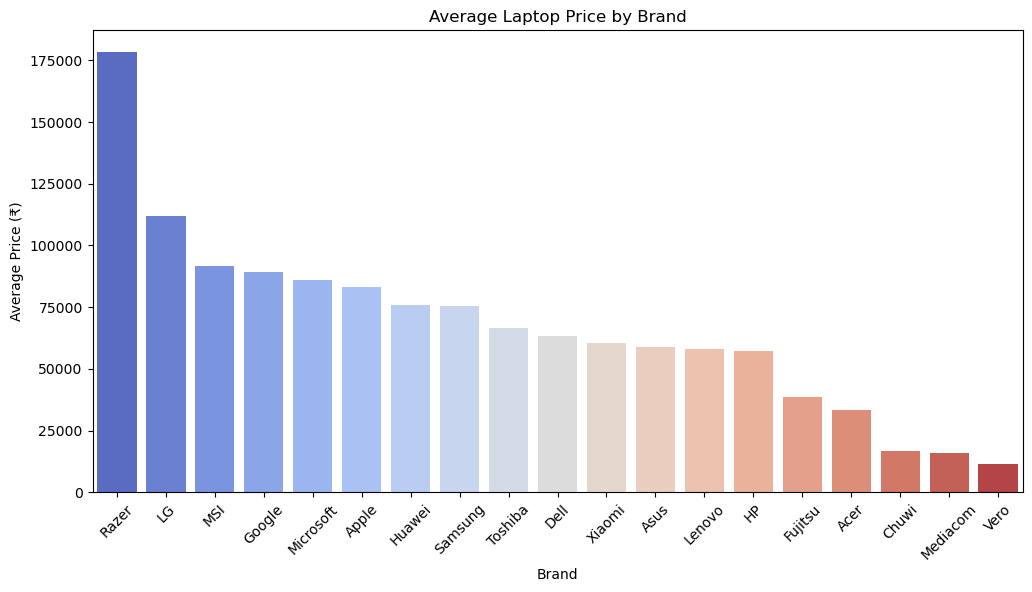

In [23]:
plt.figure(figsize=(12, 6))
brand_avg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

sns.barplot(x=brand_avg.index, y=brand_avg.values, palette='coolwarm')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Drop columns like 'Unnamed: 0', 'Unnamed: 0.1'
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [27]:
# Keep only rows where 'Inches' is a valid number
df = df[df['Inches'].apply(lambda x: str(x).replace('.', '', 1).isdigit() if pd.notnull(x) else False)]


In [29]:
# Keep only rows where 'Weight' is a valid number like '2.1kg'
df = df[df['Weight'].apply(lambda x: str(x).replace('kg', '').replace('.', '', 1).isdigit() if pd.notnull(x) else False)]


In [31]:
df['Inches'] = df['Inches'].astype(float)

In [33]:
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)


In [35]:
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)

In [37]:
df = df.dropna()

In [39]:
print("Cleaned Data Info:")
print(df.info())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   int32  
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float64
 10  Price             1271 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.2+ KB
None


In [41]:
print(df.head())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  
2         Intel HD Graphics 620  No OS    1.86   3

In [43]:
#Feature Engineering

In [45]:
# CPU Brand
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])

In [47]:
#Extract GPU Brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [49]:
#Extract Touchscreen and IPS Features from ScreenResolution
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [51]:
#Extract Resolution (X and Y) and Calculate PPI
# Extract resolution like "1920x1080"
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')

# Split into X and Y resolution and convert to float
df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True).astype(float)

# Calculate Pixels Per Inch (PPI)
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']

In [53]:
#Split Memory into SSD and HDD
def split_memory(mem):
    try:
        mem = mem.upper().replace(' ', '')
        ssd = hdd = 0
        for part in mem.split('+'):
            if 'SSD' in part:
                value = part.replace('SSD', '').replace('GB', '').replace('TB', '')
                ssd += float(value) * (1000 if 'TB' in part else 1)
            elif 'HDD' in part:
                value = part.replace('HDD', '').replace('GB', '').replace('TB', '')
                hdd += float(value) * (1000 if 'TB' in part else 1)
        return pd.Series([int(ssd), int(hdd)])
    except:
        return pd.Series([0, 0])  # Fallback in case of unexpected format
df[['SSD', 'HDD']] = df['Memory'].apply(split_memory)

In [55]:
#Standardize Operating Systems

df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'macOS': 'Mac',
    'Mac OS X': 'Mac',
    'No OS': 'Others',
    'Chrome OS': 'Others',
    'Linux': 'Others'
})

In [57]:
#Drop Intermediate Columns
df = df.drop(columns=['Resolution', 'X_res', 'Y_res'])

In [59]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Brand,Gpu_Brand,Touchscreen,IPS,PPI,SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,Intel,Intel,0,1,226.983005,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,Intel,Intel,0,0,127.677940,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Others,1.86,30636.0000,Intel,Intel,0,0,141.211998,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,Intel,AMD,0,1,220.534624,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,Intel,Intel,0,1,226.983005,256,0


In [61]:
#Model Development

In [63]:
# Encode categorical columns
label_encoders = {}
categorical_cols = ['Company', 'TypeName', 'Cpu_Brand', 'Gpu_Brand', 'OpSys']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [65]:
print(label_encoders['Company'].classes_)

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


In [67]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Brand,Gpu_Brand,Touchscreen,IPS,PPI,SSD,HDD
0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1,1.37,71378.6832,1,2,0,1,226.983005,128,0
1,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1,1.34,47895.5232,1,2,0,0,127.677940,0,0
2,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,2,1.86,30636.0000,1,2,0,0,141.211998,256,0
3,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1,1.83,135195.3360,1,0,0,1,220.534624,512,0
4,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1,1.37,96095.8080,1,2,0,1,226.983005,256,0


In [69]:
# Feature list
features = ['Company', 'TypeName', 'Ram', 'Weight', 'Inches', 'Touchscreen', 'IPS',
            'PPI', 'SSD', 'HDD', 'Cpu_Brand', 'Gpu_Brand', 'OpSys']

X = df[features]
y = df['Price']

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42)}

In [75]:
# Fit and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n {name} Performance:")
    print("R²:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", mean_squared_error(y_test, preds, squared=False))


 LinearRegression Performance:
R²: 0.6129572257678382
MAE: 15566.125842374
RMSE: 23660.91533497006

 RandomForest Performance:
R²: 0.8174029646619256
MAE: 9842.10181343159
RMSE: 16251.704630288965


In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)


In [79]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=1)

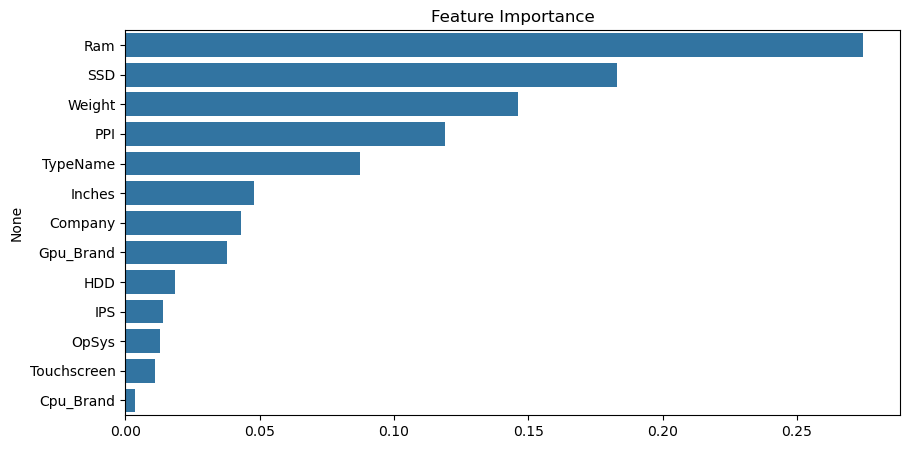

In [80]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = random_search.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance')
plt.show()


In [85]:
#Real Time Predictions
import pandas as pd

def predict_price(input_data, model, encoders, features):
    # Create a DataFrame from input dictionary
    input_df = pd.DataFrame([input_data])
    
    # Apply label encoding to categorical columns
    for col in input_df.columns:
        if col in encoders:
            le = encoders[col]
            input_df[col] = le.transform(input_df[col])

    # Reorder and select the required features (if not already done)
    input_df = input_df[features]

    # Predict the price
    predicted_price = model.predict(input_df)[0]
    return predicted_price


# Collect user input
company = input("Enter Laptop Brand (e.g., Dell, HP, Apple): ")
type_name = input("Enter Type (Notebook/Ultrabook/Gaming): ")
ram = int(input("Enter RAM size in GB: "))
weight = float(input("Enter weight in kg: "))
touchscreen = int(input("Touchscreen? (0 = No, 1 = Yes): "))
ips = int(input("IPS Display? (0 = No, 1 = Yes): "))
ppi = float(input("Enter PPI (pixels per inch): "))
cpu_brand = input("Enter CPU Brand (e.g., Intel, AMD): ")
gpu_brand = input("Enter GPU Brand (e.g., Intel, Nvidia, AMD): ")
opsys = input("Enter Operating System (e.g., Windows, Mac, Linux): ")
ssd = int(input("Enter SSD size (in GB): "))
hdd = int(input("Enter HDD size (in GB): "))
inches = float(input("Enter screen size in inches: "))

# Create input dictionary
input_spec = {
    'Company': company,
    'TypeName': type_name,
    'Ram': ram,
    'Weight': weight,
    'Touchscreen': touchscreen,
    'IPS': ips,
    'PPI': ppi,
    'Cpu_Brand': cpu_brand,
    'Gpu_Brand': gpu_brand,
    'OpSys': opsys,
    'SSD': ssd,
    'HDD': hdd,
    'Inches': inches
}

# Predict price
predicted_price = predict_price(input_spec, random_search.best_estimator_, label_encoders, features)
print(f"\n Predicted Laptop Price: ₹{predicted_price:,.2f}")


Enter Laptop Brand (e.g., Dell, HP, Apple):  Apple
Enter Type (Notebook/Ultrabook/Gaming):  Ultrabook
Enter RAM size in GB:  8
Enter weight in kg:  1.3
Touchscreen? (0 = No, 1 = Yes):  0
IPS Display? (0 = No, 1 = Yes):  1
Enter PPI (pixels per inch):  226
Enter CPU Brand (e.g., Intel, AMD):  Intel
Enter GPU Brand (e.g., Intel, Nvidia, AMD):  AMD
Enter Operating System (e.g., Windows, Mac, Linux):  Mac
Enter SSD size (in GB):  128
Enter HDD size (in GB):  0
Enter screen size in inches:  13.3



 Predicted Laptop Price: ₹67,358.51
